In [67]:
import pandas as pd
import numpy as np

In [68]:
data = pd.read_csv("/content/drive/MyDrive/reserch project/Smart-Vote-ML-main/Function 4/Model 1/divisional_results.csv")

In [69]:
data.tail()

,district,division,candidate,party,votes_count,votes_percentage
6911,Kegalle,Deraniyagala,KEERTHIE WICKRAMARATNE,AJP,29,0.05
6912,Kegalle,Deraniyagala,PRIYANTHA WICKRAMASINGHE,NSSP,80,0.14
6913,Kegalle,Deraniyagala,RANIL WICKREMESINGHE,IND16,11608,20.49
6914,Kegalle,Deraniyagala,PANI WIJESIRIWARDENA,SEP,19,0.03
6915,Kegalle,Deraniyagala,OSHALA HERATH,NIF,28,0.05


In [70]:
data["votes_percentage"].value_counts()

,count
votes_percentage,
0.02,855
0.03,723
0.01,694
0.04,497
0.05,373
...,...
2.15,1
18.00,1
49.23,1


In [71]:
# Basic information
print(data.shape)
print(data.head())
print(data.info())

(6916, 6)
  district      division                    candidate party  votes_count  \
0  Colombo  Postal Votes  AKMEEMANA DAYARATHANA THERO  IND1           10   
1  Colombo  Postal Votes       ABUBAKAR MOHAMED INFAS   DUA            1   
2  Colombo  Postal Votes         SIRIPALA AMARASINGHE  IND2            3   
3  Colombo  Postal Votes                K.K. PIYADASA  IND4           11   
4  Colombo  Postal Votes         SARATH KEERTHIRATHNA  IND5            2   

   votes_percentage  
0              0.03  
1              0.00  
2              0.01  
3              0.03  
4              0.01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          6916 non-null   object 
 1   division          6916 non-null   object 
 2   candidate         6916 non-null   object 
 3   party             6916 non-null   object 
 4   votes_co

In [72]:
# get null values count
print(data.isnull().sum())

district            0
division            0
candidate           0
party               0
votes_count         0
votes_percentage    0
dtype: int64


In [73]:
# check duplicate values and remove them
print(data.duplicated().sum())
data = data.drop_duplicates()

0


In [74]:
print(data.dtypes)


district             object
division             object
candidate            object
party                object
votes_count           int64
votes_percentage    float64
dtype: object


In [75]:
# get mean min max quiretile valus in data set
print(data.describe())


         votes_count  votes_percentage
count    6916.000000       6916.000000
mean     1925.913245          2.631599
std      7588.897948          9.226190
min         0.000000          0.000000
25%        17.000000          0.030000
50%        40.000000          0.060000
75%       105.000000          0.150000
max    117232.000000         67.200000


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

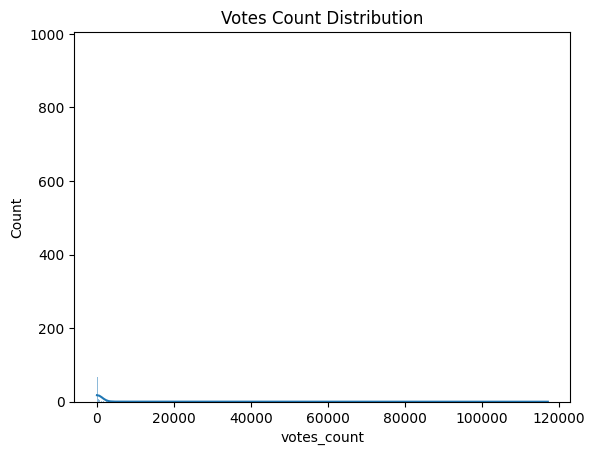

In [77]:
# vote counts
sns.histplot(data['votes_count'], kde=True)
plt.title("Votes Count Distribution")
plt.show()

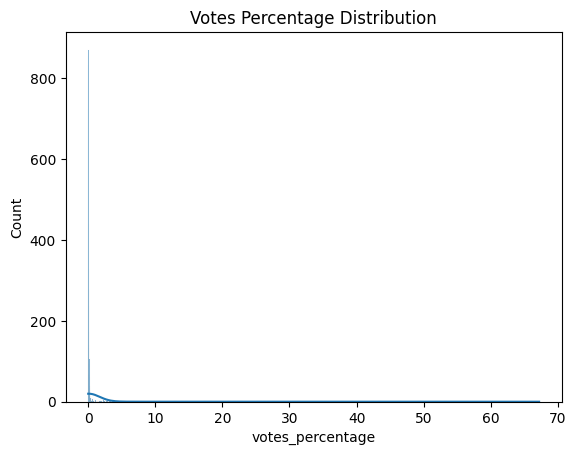

In [78]:
# vote percentage count
sns.histplot(data['votes_percentage'], kde=True)
plt.title("Votes Percentage Distribution")
plt.show()

In [79]:
# check uniqu value related to these columns
print(data['district'].nunique())
print(data['division'].nunique())
print(data['candidate'].nunique())
print(data['party'].nunique())

22
161
38
38


party
NPP      5634915
SJB      4363035
IND16    2299767
SLPP      342781
IND9      226343
SLCP      122396
IND4       47543
IND13      30660
IND12      22407
JPF        21306
IND11      15411
IND5       15187
APP        13595
DUNF       12898
NSSP       12760
SBP        12700
IND1       11536
SPF        11191
RJA        10548
IND10      10374
IND2        9035
USP         8954
JSP         6839
DUA         6531
IND14       5822
SLSP        5338
AJP         4676
SEP         4410
NIF         4253
IND15       4205
NDF         4070
IND6        4013
UNFF        3004
IND7        2799
ELPP        2405
IND8        2138
NSU         1911
SLLP        1860
Name: votes_count, dtype: int64


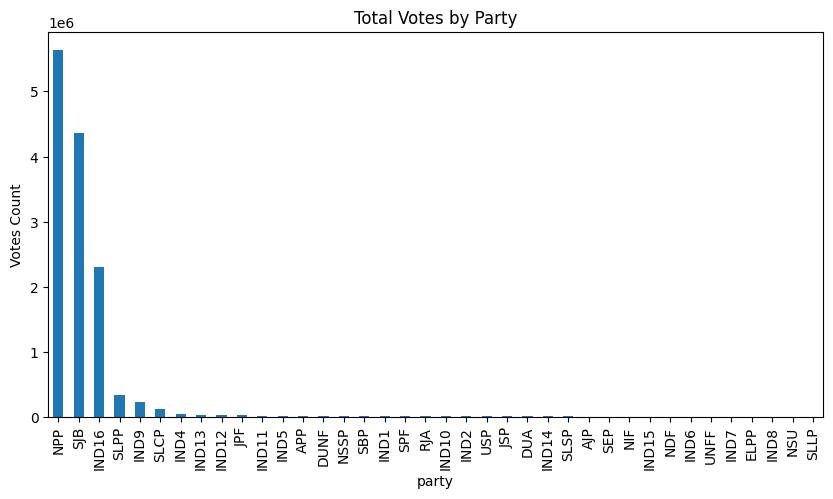

In [80]:
party_votes = data.groupby('party')['votes_count'].sum().sort_values(ascending=False)
print(party_votes)

# Visualization of the which party and their votes
party_votes.plot(kind='bar', figsize=(10, 5))
plt.title("Total Votes by Party")
plt.ylabel("Votes Count")
plt.show()


candidate
ANURA KUMARA DISSANAYAKE                   5634915
SAJITH PREMADASA                           4363035
RANIL WICKREMESINGHE                       2299767
NAMAL RAJAPAKSA                             342781
ARIYANETHIRAN PAKKIYASELVAM                 226343
DILITH JAYAWEERA                            122396
K.K. PIYADASA                                47543
DISSANAYAKA MUDIYANSELAGE BANDARANAYAKE      30660
SARATH FONSEKA                               22407
WIJEYADASA RAJAPAKSHE                        21306
Name: votes_count, dtype: int64


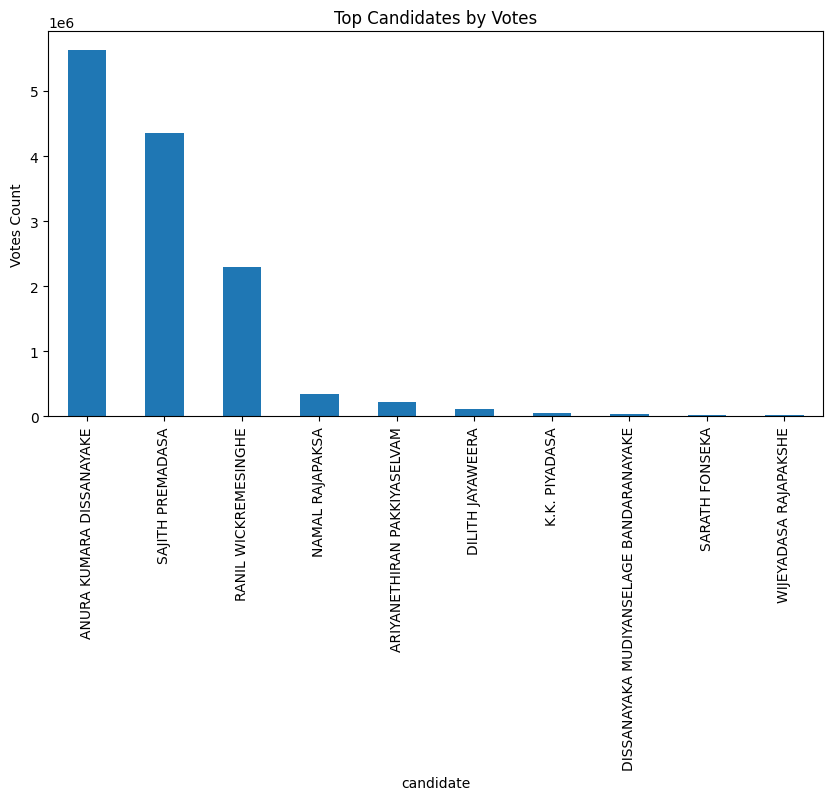

In [82]:
# top candidates and vote count
top_candidates = data.groupby('candidate')['votes_count'].sum().sort_values(ascending=False).head(10)
print(top_candidates)

# Visualization
top_candidates.plot(kind='bar', figsize=(10, 5))
plt.title("Top Candidates by Votes")
plt.ylabel("Votes Count")
plt.show()


district
Gampaha         1458389
Colombo         1334390
Kurunegala      1130293
Mahanuwara       933516
Kalutara         817518
Ratnapura        741900
Galle            712820
Anuradhapura     603686
Kegalle          569679
Badulla          568924
Matara           548329
Nuwaraeliya      473935
Puttalam         470095
Hambantota       427062
Digamadulla      423397
Jaffna           371688
Matale           339734
Monaragala       335082
Batticaloa       318648
Polonnaruwa      283801
Trincomalee      239461
Vanni            217269
Name: votes_count, dtype: int64


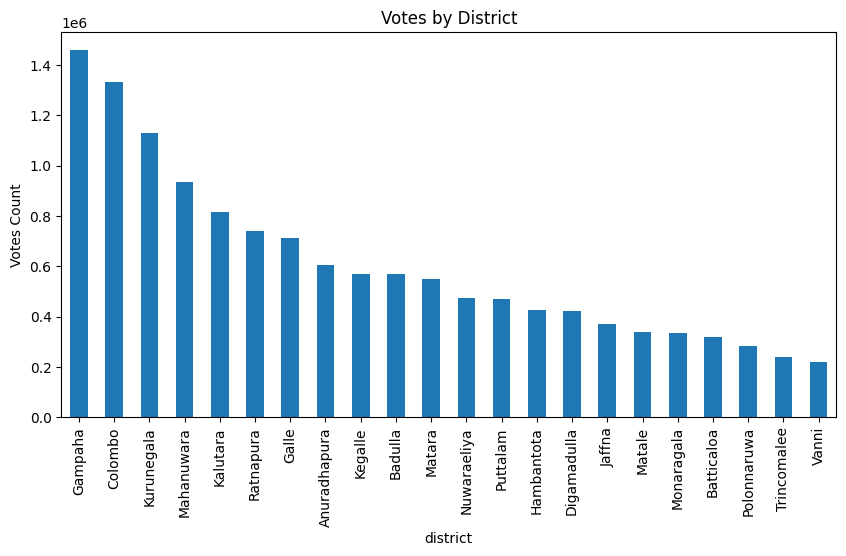

In [83]:
# district vise vote count
district_votes = data.groupby('district')['votes_count'].sum().sort_values(ascending=False)
print(district_votes)

# Visualization
district_votes.plot(kind='bar', figsize=(10, 5))
plt.title("Votes by District")
plt.ylabel("Votes Count")
plt.show()


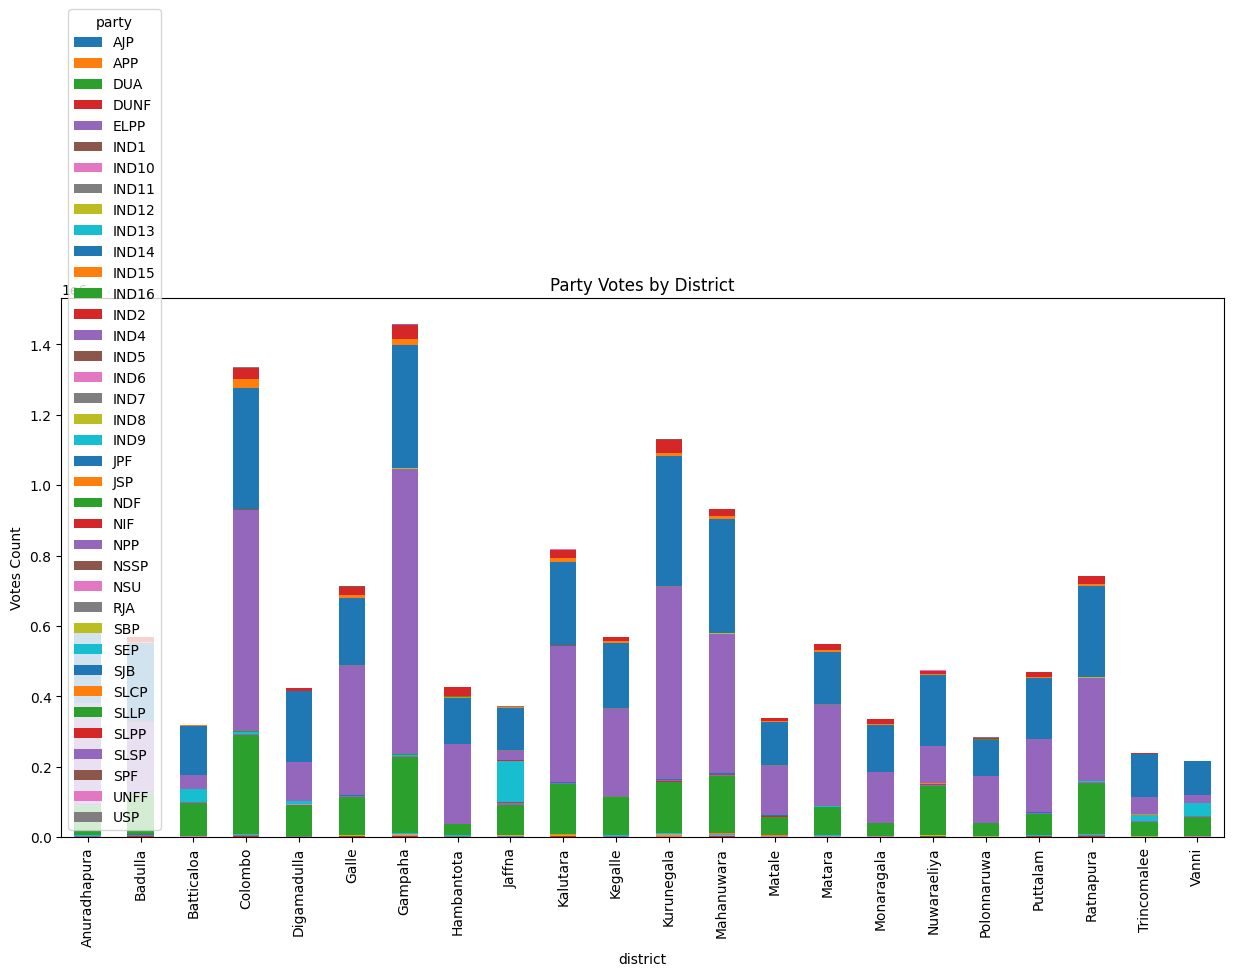

In [84]:
# vote count againts disrict and the party vice
district_party_votes = data.groupby(['district', 'party'])['votes_count'].sum().unstack()
district_party_votes.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Party Votes by District")
plt.ylabel("Votes Count")
plt.show()


In [86]:
#Model building for catgerical variables

In [87]:
!pip install --upgrade scikit-learn

In [88]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [89]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [91]:
# Initialize LabelEncoder
encoder = LabelEncoder()

In [92]:
# Apply LabelEncoder to each categorical column
data['district'] = encoder.fit_transform(data['district'])
data['division'] = encoder.fit_transform(data['division'])
data['party'] = encoder.fit_transform(data['party'])
data['candidate'] = encoder.fit_transform(data['candidate'])

In [93]:
from sklearn.model_selection import train_test_split
# define e and y values
# Features and target
X = data.drop(['votes_percentage'], axis=1)  # Use votes_percentage if appropriate
y = data['votes_percentage']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
print(X_train.head())


      district  division  candidate  party  votes_count
63           3        30         33     26            5
1044         6        41          6      7           85
2592         5        56         10     31          876
3053        14        96          3     27           37
227          3        31         23     23            3


In [96]:
from sklearn.preprocessing import MinMaxScaler
# create object and encode train set and test sets
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [98]:
# Build the ANN model Artificial Neural Network (ANN)
model = Sequential()

# Input Layer (you can adjust the number of neurons in each layer as needed)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden Layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output Layer (assuming regression task, use linear activation)
model.add(Dense(units=1, activation='linear'))

# Compile the model with comparing use mean squad error
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 85.4508 - val_loss: 74.1543
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.3920 - val_loss: 10.2081
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7916 - val_loss: 8.2753
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.1001 - val_loss: 8.4835
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.7979 - val_loss: 7.8183
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5475 - val_loss: 7.1392
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5853 - val_loss: 6.8939
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3780 - val_loss: 6.5201
Epoch 9/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8446 - val_loss: 6.4456
Epoch 10/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4891 - val_loss: 6.3395
Epoch 11/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9926 - val_loss: 6.2298
Epoch 12/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

In [101]:
# Evaluate the model
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [107]:
from sklearn.metrics import mean_squared_error

# Calculate the error and show Deviation percentage acoocrdin to mean squired error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2.3774016255605246


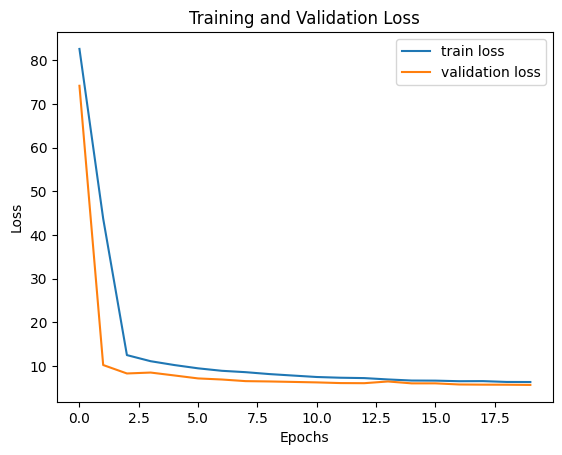

In [105]:
# Visualize training history with validation loss and tarining loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [106]:
# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)